## Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file. 

Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.


In [1]:
import pandas as pd

In [2]:
! ls -l

total 1014508
-rw-rw-r--. 1 dsc dsc 554970628 Jan  4  2016 bookings.csv.bz2
-rw-rw-r--. 1 dsc dsc     54834 Dec  2 17:13 bookings.sample.csv.bz2
-rw-rw-r--. 1 dsc dsc    425006 Dec  2 17:23 bookings.sample.csv.csv
-rw-rw-r--. 1 dsc dsc     11743 Dec  2 19:38 ch_01.ipynb
-rw-rw-r--. 1 dsc dsc    102440 Dec  2 21:29 ch_02.ipynb
-rw-rw-r--. 1 dsc dsc     10832 Dec  3 09:04 ch_03.ipynb
-rw-rw-r--. 1 dsc dsc      8019 Dec  2 14:36 ch_04.ipynb
-rw-rw-r--. 1 dsc dsc     12165 Dec  2 21:44 ch_05b.ipynb
-rw-rw-r--. 1 dsc dsc      3442 Dec  2 21:47 ch_05.ipynb
-rw-rw-r--. 1 dsc dsc 483188920 Jan  4  2016 searches.csv.bz2
-rw-rw-r--. 1 dsc dsc     33984 Dec  2 20:54 top_airports.csv


In [3]:
! bzcat searches.csv.bz2 | head -1000 > searches.sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = searches.csv.bz2, output file = (stdout)


In [4]:
! bzip2 searches.sample.csv

In [6]:
ls -l *.bz2

-rw-rw-r--. 1 dsc dsc 554970628 Jan  4  2016 bookings.csv.bz2
-rw-rw-r--. 1 dsc dsc     54834 Dec  2 17:13 bookings.sample.csv.bz2
-rw-rw-r--. 1 dsc dsc 483188920 Jan  4  2016 searches.csv.bz2
-rw-rw-r--. 1 dsc dsc     29366 Dec  3 09:09 searches.sample.csv.bz2


In [7]:
s= pd.read_csv('./searches.sample.csv.bz2', sep='^', nrows=500)

In [8]:
s.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [13]:
pd.set_option('display.max_columns',None)

In [14]:
s.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [15]:
s=pd.read_csv('./searches.sample.csv.bz2', sep='^', usecols=['Date','Destination'],nrows=500)

In [17]:
s.head(1)

,Date,Destination
0,2013-01-01,AUH


In [19]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
Date           500 non-null object
Destination    500 non-null object
dtypes: object(2)
memory usage: 7.9+ KB


In [20]:
s.dtypes

Date           object
Destination    object
dtype: object

## Select the columns of interest

In [21]:
import pandas as pd
s=pd.read_csv('./searches.sample.csv.bz2', sep='^', usecols=['Date','Destination'],nrows=500)
s=s.dropna()

## Make action plan


### filter out the the searches for MAD, BCN, AGP
take only the rows having MAD, BCN or AGP as destination

In [22]:
import pandas as pd
s=pd.read_csv('./searches.sample.csv.bz2', sep='^', usecols=['Date','Destination'],nrows=500)
s=s.dropna()
sFilter=s[(s['Destination']=='MAD')|(s['Destination']=='BCN')|(s['Destination']=='AGP')]

In [24]:
sFilter=s[s['Destination'].isin(['MAD', 'BCN', 'AGP'])]

In [25]:
sFilter.head()

,Date,Destination
4,2013-01-01,MAD
93,2013-01-01,AGP
113,2013-01-01,BCN
147,2013-01-01,AGP
151,2013-01-01,MAD


In [26]:
#Option 0) parse_dates inside read_csv
import pandas as pd
s=pd.read_csv('./searches.sample.csv.bz2', sep='^', usecols=['Date','Destination']\
              ,parse_dates=['Date'], nrows=500)
s=s.dropna()
sFilter=s[(s['Destination']=='MAD')|(s['Destination']=='BCN')|(s['Destination']=='AGP')]

In [28]:
s.head(2)

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL


In [29]:
s.dtypes

Date           datetime64[ns]
Destination            object
dtype: object

In [30]:
import pandas as pd
s=pd.read_csv('./searches.sample.csv.bz2', sep='^', usecols=['Date','Destination'],nrows=500)
s=s.dropna()
sFilter=s[(s['Destination']=='MAD')|(s['Destination']=='BCN')|(s['Destination']=='AGP')]

In [32]:
pd.to_datetime(sFilter['Date'].iloc[1])

Timestamp('2013-01-01 00:00:00')

In [33]:
sFilter['Date2']=pd.to_datetime(sFilter['Date'])

/home/dsc/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [ ]:
df=pd.DataFrame({'x':[1,2]})

In [36]:
df

,x
0,1
1,2


In [2]:
# with this we will not be getting this warning message
pd.options.mode.chained_assignment=None 
#pd.options.mode.chained_assignment='warn' #default

In [45]:
df_sub=df[0:1]
df_sub

,x
0,-1


In [42]:
df_sub.x=-2

In [43]:
df

,x
0,-1
1,2


In [ ]:
#with .copy() there is no worning as we make a true copy
df=pd.DataFrame({'x':[1,2]})
pd.options.mode.chained_assignment='warn'
df_sub=df[0:1].copy()
df_sub.x=-2
df

In [5]:
#Option 1) use directly pd.to_datetime()
import pandas as pd
s=pd.read_csv('./searches.sample.csv.bz2', sep='^', usecols=['Date','Destination'],nrows=500)
s=s.dropna()
sFilter=s[(s['Destination']=='MAD')|(s['Destination']=='BCN')|(s['Destination']=='AGP')]
sFilter['Date']=pd.to_datetime(sFilter['Date'], format="%Y-%m-%d")

In [6]:
sFilter.head(2)

,Date,Destination
4,2013-01-01,MAD
93,2013-01-01,AGP


In [51]:
pd.to_datetime(sFilter['Date'].iloc[1]).month

1

In [52]:
pd.to_datetime(sFilter['Date'].iloc[1]).year

2013

In [57]:
pd.to_datetime(sFilter['Date']).year

AttributeError: 'Series' object has no attribute 'year'

In [68]:
sFilter['PlotDate']=sFilter['Date'].map(lambda x:"%d-%02d"%(x.year, x.month))

In [69]:
sFilter.head(5)

,Date,Destination,PlotDate
4,2013-01,MAD,2013-01
93,2013-01,AGP,2013-01
113,2013-01,BCN,2013-01
147,2013-01,AGP,2013-01
151,2013-01,MAD,2013-01


In [3]:
#Option 1) use directly pd.to_datetime()
import pandas as pd
s=pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2', sep='^', usecols=['Date','Destination'],nrows=500)
s=s.dropna()
sFilter=s[(s['Destination']=='MAD')|(s['Destination']=='BCN')|(s['Destination']=='AGP')]
sFilter['Date']=pd.to_datetime(sFilter['Date'], format="%Y-%m-%d")
sFilter['DatePlot']=sFilter['Date'].map(lambda x:"%d-%02d"%(x.year, x.month))
sFilter.head(3)

/home/dsc/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/dsc/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,Destination,DatePlot
4,2013-01-01,MAD,2013-01
93,2013-01-01,AGP,2013-01
113,2013-01-01,BCN,2013-01


In [72]:
#Option 2) get DatePlot directly from the string
import pandas as pd
s=pd.read_csv('./searches.sample.csv.bz2', sep='^', usecols=['Date','Destination'],nrows=500)
s=s.dropna()
sFilter=s[(s['Destination']=='MAD')|(s['Destination']=='BCN')|(s['Destination']=='AGP')]
sFilter.head(3)

,Date,Destination
4,2013-01-01,MAD
93,2013-01-01,AGP
113,2013-01-01,BCN


In [75]:
sFilter['PlotDate']=sFilter['Date'].map(lambda x: "%s-%s"%(x.split('-')[0],x.split('-')[1]))

In [76]:
sFilter.head(3)

,Date,Destination,PlotDate
4,2013-01-01,MAD,2013-01
93,2013-01-01,AGP,2013-01
113,2013-01-01,BCN,2013-01


In [77]:
#Option 2) get DatePlot directly from the string
import pandas as pd
s=pd.read_csv('./searches.sample.csv.bz2', sep='^', usecols=['Date','Destination'],nrows=500)
s=s.dropna()
sFilter=s[(s['Destination']=='MAD')|(s['Destination']=='BCN')|(s['Destination']=='AGP')]
sFilter['DatePlot']=sFilter['Date'].map(lambda x: "%s-%s"%(x.split('-')[0],x.split('-')[1]))
sFilter.head(3)

,Date,Destination
4,2013-01,MAD
93,2013-01,AGP
113,2013-01,BCN


In [78]:
x='adfsfdfsf'

In [80]:
x.split('-')[0]

'adfsfdfsf'

## group by arr_port search month

In [117]:
#Option 1) use directly pd.to_datetime()
import pandas as pd
s=pd.read_csv('./searches.csv.bz2', sep='^', usecols=['Date','Destination'],nrows=100000)
s=s.dropna()
sFilter=s[(s['Destination']=='MAD')|(s['Destination']=='BCN')|(s['Destination']=='AGP')]
sFilter['Date']=pd.to_datetime(sFilter['Date'], format="%Y-%m-%d")
sFilter['DatePlot']=sFilter['Date'].map(lambda x:"%d-%02d"%(x.year, x.month))
#sFilter.head(3)

In [8]:
#Option 2) get DatePlot directly from the string
import pandas as pd
s=pd.read_csv('./searches.csv.bz2', sep='^', usecols=['Date','Destination'],nrows=100000)
s=s.dropna()
sFilter=s[(s['Destination']=='MAD')|(s['Destination']=='BCN')|(s['Destination']=='AGP')]
sFilter['DatePlot']=sFilter['Date'].map(lambda x: "%s-%s"%(x.split('-')[0],x.split('-')[1]))
sFilter.head(3)

,Date,Destination,DatePlot
4,2013-01-01,MAD,2013-01
93,2013-01-01,AGP,2013-01
113,2013-01-01,BCN,2013-01


In [104]:
sFilter.head(3)

,Date,Destination,DatePlot
4,2013-01-01,MAD,2013-01
93,2013-01-01,AGP,2013-01
113,2013-01-01,BCN,2013-01


In [118]:
sFilter_gr=sFilter.groupby(['DatePlot', 'Destination']).count()

In [108]:
sFilter_gr

Date
DatePlot Destination      
2013-01  AGP             7
         BCN            26
         MAD            11

In [119]:
sFilter_gr_reset=sFilter_gr.reset_index()

In [120]:
sFilter_gr_reset.rename(columns={'Date':'Search'})

,DatePlot,Destination,Search
0,2013-01,AGP,169
1,2013-01,BCN,517
2,2013-01,MAD,425
3,2013-02,AGP,147
4,2013-02,BCN,497
5,2013-02,MAD,400
6,2013-03,AGP,187
7,2013-03,BCN,536
8,2013-03,MAD,433
9,2013-04,AGP,31


In [1]:
#Option 1) use directly pd.to_datetime()
import pandas as pd
s=pd.read_csv('./searches.csv.bz2', sep='^', usecols=['Date','Destination'],nrows=100000)
s=s.dropna()
sFilter=s[(s['Destination']=='MAD')|(s['Destination']=='BCN')|(s['Destination']=='AGP')]
sFilter['Date']=pd.to_datetime(sFilter['Date'], format="%Y-%m-%d")
sFilter['DatePlot']=sFilter['Date'].map(lambda x:"%d-%02d"%(x.year, x.month))
sFilter_gr=sFilter.groupby(['DatePlot', 'Destination']).count()
sFilter_gr_reset=sFilter_gr.reset_index()
sFilter_gr_reset.rename(columns={'Date':'Search'}, inplace=True)
sFilter_gr_reset

IOError: [Errno 2] No such file or directory: './searches.csv.bz2'

In [2]:
#Option 2) get DatePlot directly from the string
import pandas as pd
s=pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2', sep='^', usecols=['Date','Destination'],nrows=100000)
s=s.dropna()
sFilter=s[(s['Destination']=='MAD')|(s['Destination']=='BCN')|(s['Destination']=='AGP')]
sFilter['DatePlot']=sFilter['Date'].map(lambda x: "%s-%s"%(x.split('-')[0],x.split('-')[1]))
sFilter_gr=sFilter.groupby(['DatePlot', 'Destination']).count()
sFilter_gr_reset=sFilter_gr.reset_index()
sFilter_gr_reset.rename(columns={'Date':'Search'}, inplace=True)
sFilter_gr_reset.head(10)

/home/dsc/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,DatePlot,Destination,Search
0,2013-01,AGP,169
1,2013-01,BCN,517
2,2013-01,MAD,425
3,2013-02,AGP,147
4,2013-02,BCN,497
5,2013-02,MAD,400
6,2013-03,AGP,187
7,2013-03,BCN,536
8,2013-03,MAD,433
9,2013-04,AGP,31


## 4.3 Plotting

In [4]:
prepared_df=sFilter_gr_reset.pivot('DatePlot','Destination','Search')

In [5]:
prepared_df

Destination,AGP,BCN,MAD
DatePlot,,,
2013-01,169,517,425
2013-02,147,497,400
2013-03,187,536,433
2013-04,31,174,147


Populating the interactive namespace from numpy and matplotlib


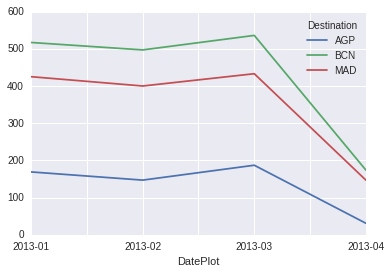

In [6]:
%pylab inline
prepared_df.plot(grid=True)

In [7]:
import seaborn as sns

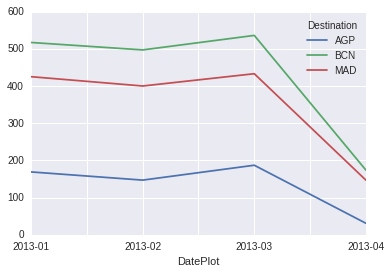

In [8]:
prepared_df.plot(grid=True)

In [29]:
prepared_df.index

Index([u'2013-01', u'2013-02', u'2013-03', u'2013-04'], dtype='object', name=u'DatePlot')

In [42]:
prepared_df.reset_index()

Destination,DatePlot,AGP,BCN,MAD
0,2013-01,169,517,425
1,2013-02,147,497,400
2,2013-03,187,536,433
3,2013-04,31,174,147


In [43]:
prepared_df

Destination,AGP,BCN,MAD
DatePlot,,,
2013-01,169,517,425
2013-02,147,497,400
2013-03,187,536,433
2013-04,31,174,147


In [14]:
sFilter_gr_reset.reset_index()

,index,DatePlot,Destination,Search
0,0,2013-01,AGP,169
1,1,2013-01,BCN,517
2,2,2013-01,MAD,425
3,3,2013-02,AGP,147
4,4,2013-02,BCN,497
5,5,2013-02,MAD,400
6,6,2013-03,AGP,187
7,7,2013-03,BCN,536
8,8,2013-03,MAD,433
9,9,2013-04,AGP,31


In [47]:
#sns.lmplot('index', 'Destination', data=sFilter_gr_reset.reset_index(),fit_reg=False)
sns.lmplot(x='index', y='Search', data=sFilter_gr_reset.reset_index(),
       fit_reg=False, # No regression line
       hue='Destination') 

TypeError: lmplot() takes at least 3 arguments (3 given)

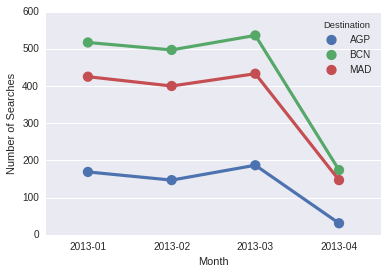

In [58]:
ax=sns.pointplot(x='DatePlot', y='Search', hue='Destination', data=sFilter_gr_reset) 
ax.set(xlabel='Month', ylabel='Number of Searches')

## 5) Adjust the code to work with Big data

Populating the interactive namespace from numpy and matplotlib
Chunk 0
Chunk 1
Chunk 2
Chunk 3
Chunk 4
Chunk 5
Chunk 6
Chunk 7
Chunk 8
Chunk 9
Chunk 10
Chunk 11
Chunk 12
Chunk 13
Chunk 14
Chunk 15
Chunk 16
Chunk 17
Chunk 18
Chunk 19
Chunk 20


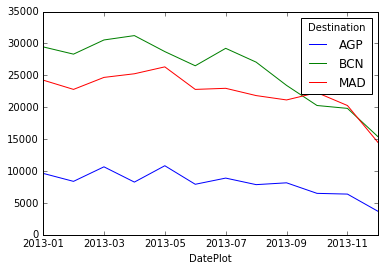

In [143]:
#Option 2) get DatePlot directly from the string
#this doesnt raise any error
import pandas as pd
%pylab inline


#s=pd.read_csv('./searches.sample.csv.bz2', sep='^', usecols=['Date','Destination'],nrows=100000)
sc=pd.read_csv('./searches.csv.bz2', sep='^', usecols=['Date','Destination']\
               ,chunksize=1000000)

all_results=pd.DataFrame()
for i, chunk in enumerate(sc):
    print "Chunk %d"%i
    s=chunk.dropna()
    sFilter=s[s['Destination'].isin(['MAD', 'BCN', 'AGP'])]
    sFilter['DatePlot']=sFilter['Date'].map(lambda x: "%s-%s"%(x.split('-')[0],x.split('-')[1]))
    sFilter_gr=sFilter.groupby(['DatePlot', 'Destination']).count()
    sFilter_gr_reset=sFilter_gr.reset_index()
    sFilter_gr_reset.rename(columns={'Date':'Search'}, inplace=True)
    all_results=all_results.append(sFilter_gr_reset)

all_results_gr_reset=all_results.groupby(['DatePlot', 'Destination']).sum().reset_index()
prepared_df=all_results_gr_reset.pivot('DatePlot','Destination','Search')
prepared_df.plot()

Populating the interactive namespace from numpy and matplotlib
Chunk 0
Chunk 1
Chunk 2


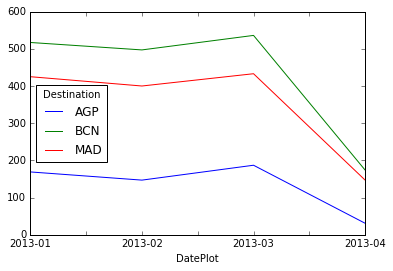

In [142]:
#Option 1) use directly pd.to_datetime()
#this raises error if we call to_datetime() before filtering over the 3 destinations
import pandas as pd
%pylab inline
sc=pd.read_csv('./searches.sample.csv.bz2', sep='^', usecols=['Date','Destination']\
               ,chunksize=40000)

all_results=pd.DataFrame()
for i, chunk in enumerate(sc):
    print "Chunk %d"%i
    s=chunk.dropna()
    sFilter=s[(s['Destination']=='MAD')|(s['Destination']=='BCN')|(s['Destination']=='AGP')]
    sFilter['Date']=pd.to_datetime(sFilter['Date'], format="%Y-%m-%d")
    sFilter['DatePlot']=sFilter['Date'].map(lambda x:"%d-%02d"%(x.year, x.month))
    sFilter_gr=sFilter.groupby(['DatePlot', 'Destination']).count()
    sFilter_gr_reset=sFilter_gr.reset_index()
    sFilter_gr_reset.rename(columns={'Date':'Search'}, inplace=True)
    all_results=all_results.append(sFilter_gr_reset)
    
all_results_gr_reset=all_results.groupby(['DatePlot', 'Destination']).sum().reset_index()
prepared_df=all_results_gr_reset.pivot('DatePlot','Destination','Search')
prepared_df.plot()    

In [139]:
all_rebsults_gr

,DatePlot,Destination,Search
0,2013-01,AGP,169
1,2013-01,BCN,517
2,2013-01,MAD,425
3,2013-02,AGP,147
4,2013-02,BCN,497
5,2013-02,MAD,400
6,2013-03,AGP,187
7,2013-03,BCN,536
8,2013-03,MAD,433
9,2013-04,AGP,31


In [11]:
#looking for error

#Option 1) use directly pd.to_datetime()
#this raises error if we call to_datetime() before filtering over the 3 destinations
import pandas as pd
%pylab inline
sc=pd.read_csv('./searches.csv.bz2', sep='^', usecols=['Date','Destination']\
               ,skiprows=range(1,10000000),chunksize=1000000)

all_results=pd.DataFrame()
for i, chunk in enumerate(sc):
    print "Chunk %d"%i
    s=chunk.dropna()
    s['Date']=pd.to_datetime(s['Date'],errors='raise') #without error='raise' you are not aware of error
    sFilter=s[(s['Destination']=='MAD')|(s['Destination']=='BCN')|(s['Destination']=='AGP')]
    sFilter['DatePlot']=sFilter['Date'].map(lambda x:"%d-%02d"%(x.year, x.month))
    sFilter_gr=sFilter.groupby(['DatePlot', 'Destination']).count()
    sFilter_gr_reset=sFilter_gr.reset_index()
    sFilter_gr_reset.rename(columns={'Date':'Search'}, inplace=True)
    all_results=all_results.append(sFilter_gr_reset)
    
all_results_gr_reset=all_results.groupby(['DatePlot', 'Destination']).sum().reset_index()
prepared_df=all_results_gr_reset.pivot('DatePlot','Destination','Search')
prepared_df.plot()    

Populating the interactive namespace from numpy and matplotlib


KeyboardInterrupt: 

In [144]:
#looking for error

#Option 0) parse_dates inside read_csv
# this is the easiest way to parse a date:)

import pandas as pd
%pylab inline


#s=pd.read_csv('./searches.sample.csv.bz2', sep='^', usecols=['Date','Destination'],nrows=100000)
sc=pd.read_csv('./searches.csv.bz2', sep='^', usecols=['Date','Destination']\
               ,parse_dates=['Date'], skiprows=range(1,10000000),chunksize=1000000)

all_results=pd.DataFrame()
for i, chunk in enumerate(sc):
    print "Chunk %d"%i
    s=chunk.dropna()
    sFilter=s[s['Destination'].isin(['MAD', 'BCN', 'AGP'])]
    sFilter['DatePlot']=sFilter['Date'].map(lambda x:"%d-%02d"%(x.year, x.month))
    sFilter_gr=sFilter.groupby(['DatePlot', 'Destination']).count()
    sFilter_gr_reset=sFilter_gr.reset_index()
    sFilter_gr_reset.rename(columns={'Date':'Search'}, inplace=True)
    all_results=all_results.append(sFilter_gr_reset)

all_results_gr_reset=all_results.groupby(['DatePlot', 'Destination']).sum().reset_index()
prepared_df=all_results_gr_reset.pivot('DatePlot','Destination','Search')
prepared_df.plot()

Populating the interactive namespace from numpy and matplotlib
Chunk 0


AttributeError: 'str' object has no attribute 'year'

In [ ]:
#making larger search sample
! bzcat searches.csv.bz2 | head -100000 > searches.sample.csv

In [132]:
! bzip2 -f searches.sample.csv
! ls -l *.bz2

-rw-rw-r--. 1 dsc dsc 554970628 Jan  4  2016 bookings.csv.bz2
-rw-rw-r--. 1 dsc dsc     54834 Dec  2 17:13 bookings.sample.csv.bz2
-rw-rw-r--. 1 dsc dsc 483188920 Jan  4  2016 searches.csv.bz2
-rw-rw-r--. 1 dsc dsc   2432065 Dec  3 11:58 searches.sample.csv.bz2


In [12]:
#How to find out which line has problems???
bzcat searches.csv.bz2 | cut -d '^' -f 1 | grep -n -E -v "^[0-9]{4}-[0-1][0-9]-[0-3][0-9]$"> bad_search_lines.csv
bzcat searches.csv.bz2 | sed 's/\s*^/^/g' > searches.clean.csv & #15-20 min # \s =space
bzip2 searches.clean.csv &

SyntaxError: invalid syntax (<ipython-input-12-90811e0427eb>, line 2)